## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

### **I did Q1 and Q2.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0) 

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

Below are the scatterplots. As the noise increases, the visual distinctness of the clusters decreases. 0.125 has the least noise and we can very distinctly see the 3 clusters. But, as the noise increases, the clusters begin to overlap and the groups become less distinct. 

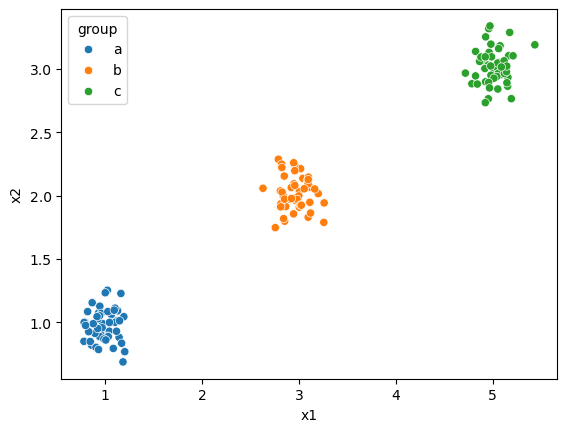

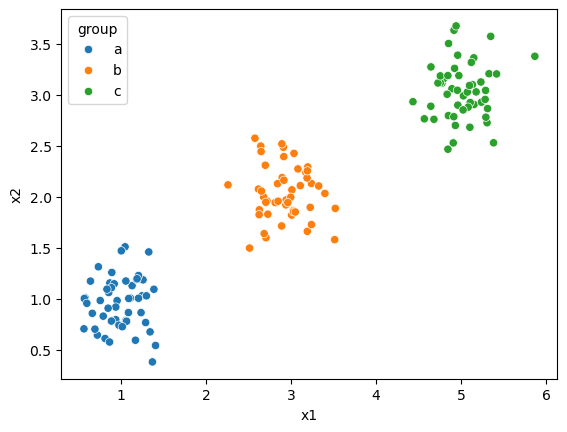

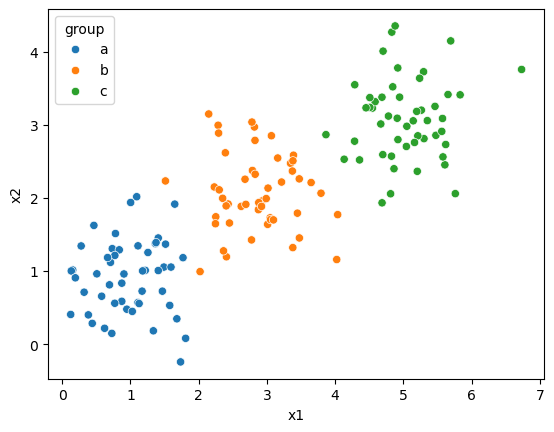

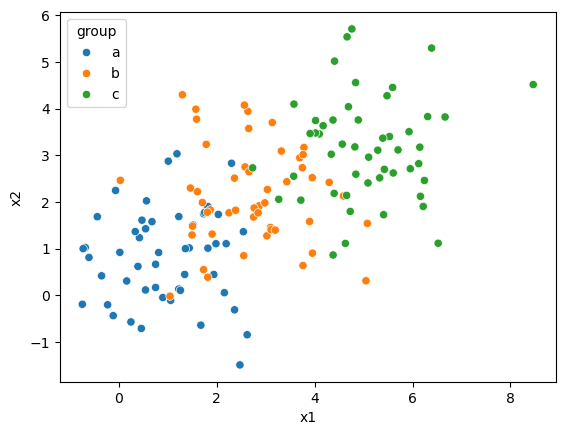

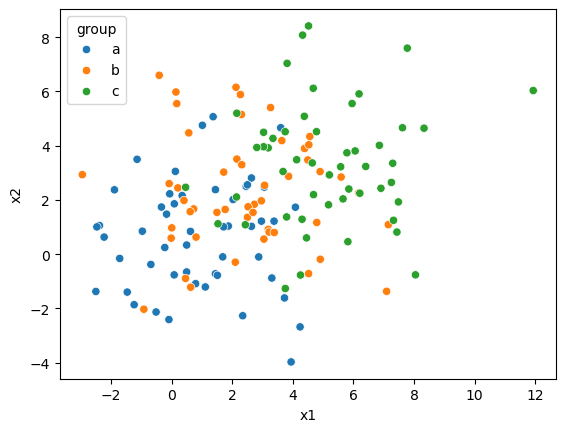

In [140]:
dfs = [df0_125, df0_25, df0_5, df1_0, df2_0]

for each in dfs:
    sns.scatterplot(data=each, x='x1', y='x2', hue='group')
    plt.show()

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

Screeplots are below. With less noise, the screeplots show the elbow at 2 or 3 clusters which is pretty accurate. But, as the noise increases, the elbow gets smaller and is at 2. This shows that with more noise, the clusters seem to get closer or overlap, and it is harder to create distinct groups. 


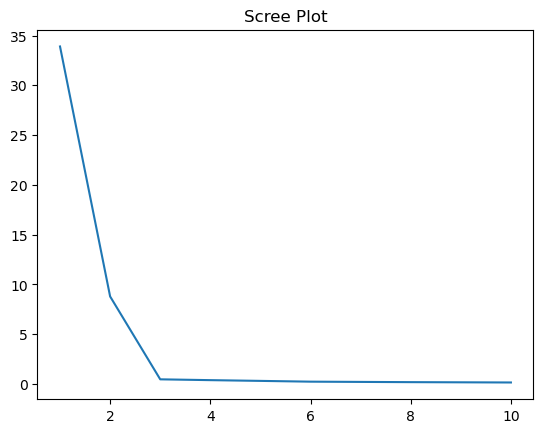

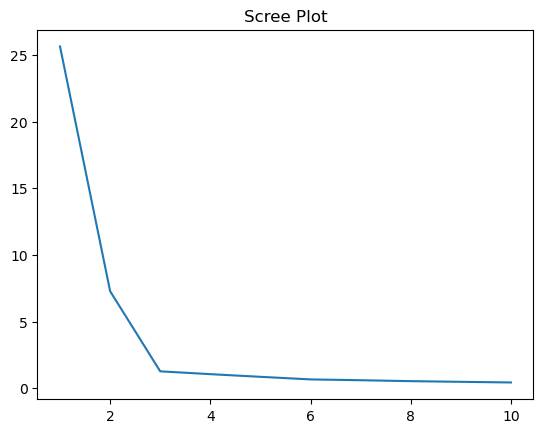

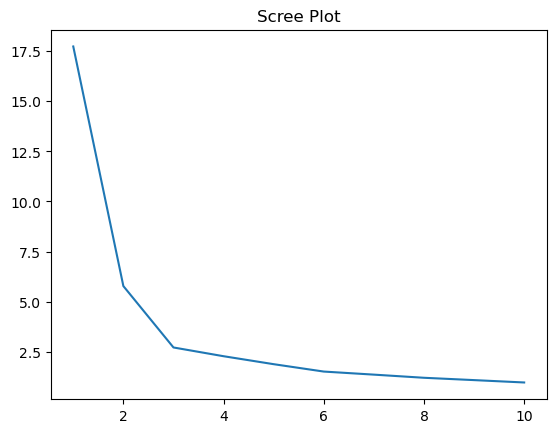

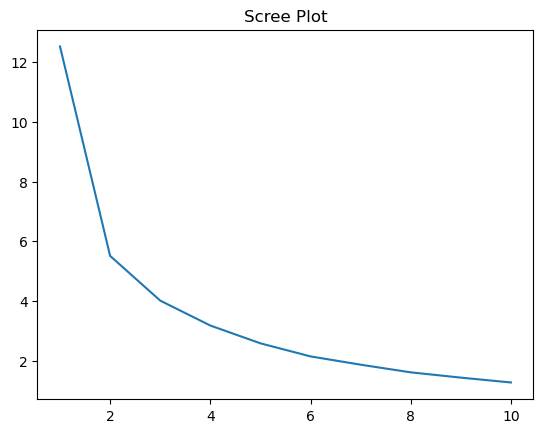

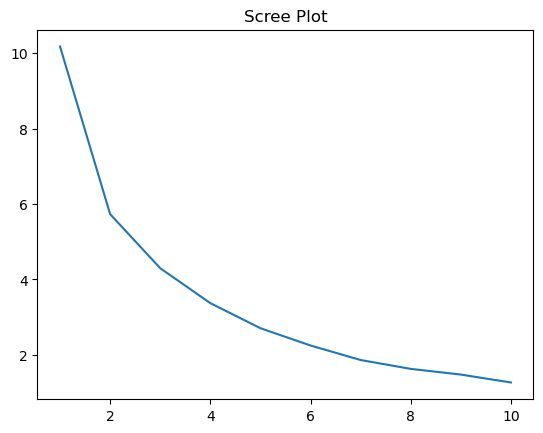

In [141]:
def maxmin(x): # Max-min scaler function
    x = (x-x.min())/(x.max()-x.min())
    return x

for x in dfs:
    x = x[['x1', 'x2']]
    x = x.apply(maxmin)

    k_bar = 10
    SSE = [] # We'll store the training error here

    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(x) # Fit the model
        SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector
    sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot
    plt.show()


4. Explain the intuition of the elbow, using this numerical simulation as an example.

The elbow shows where the sum of squared errors starts to level out. This is the point of the optimal number of clusters because initially, the error decreases as a fast rate, and then slows off. If we continue to go down the graph, the error becomes very small, meaning it is overfitting and creating too many groups. This is why we must choose an optimal point where the error starts to level off, but does not start putting each point in its own group. We can see this with our example, as with less noise, the model suggests 3 clusters, and with more noise, the model suggests 2 clusters. Overall, the elbow point is the balancing point between underfit and overfit that indicates the optimal amount of clusters.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?

I see that the dollar values have dollar signs and commas, so I must remove those. I also see that the data type is object, so I will turn them into numerics after cleaning.

In [142]:
data = pd.read_csv('./data/2022 election cycle fundraising.csv')

In [143]:
# replace the commas
data['Raised'] = data['Raised'].replace(',', '', regex=True)
data['Spent'] = data['Spent'].replace(',', '', regex=True)
data['Cash on Hand'] = data['Cash on Hand'].replace(',', '', regex=True)
data['Debts'] = data['Debts'].replace(',', '', regex=True)

# replace the $
data['Raised'] = data['Raised'].replace('\$', '', regex=True)
data['Spent'] = data['Spent'].replace('\$', '', regex=True)
data['Cash on Hand'] = data['Cash on Hand'].replace('\$', '', regex=True)
data['Debts'] = data['Debts'].replace('\$', '', regex=True)

# turn into numeric
data[['Raised', 'Spent', 'Cash on Hand', 'Debts']] = data[['Raised', 'Spent', 'Cash on Hand', 'Debts']].apply(pd.to_numeric, errors='coerce')

In [144]:
data.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0


2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.

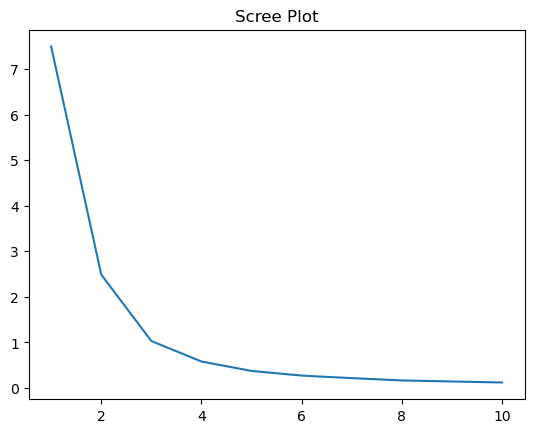

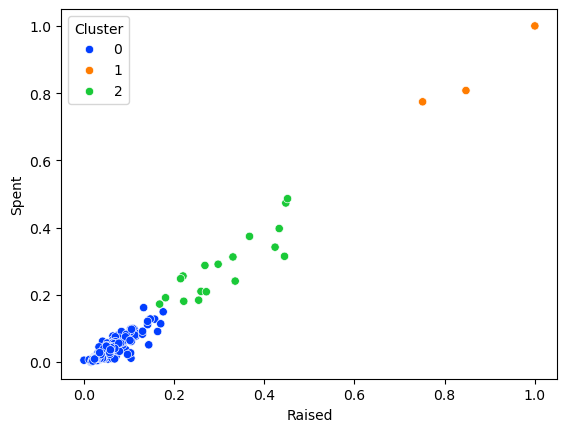

Cluster
0    516
2     18
1      3
Name: count, dtype: int64
     index                  Member       Party           State Chamber  \
2        2             Adam Schiff  Democratic      California   House   
87      87  Catherine Cortez Masto  Democratic          Nevada  Senate   
89      89           Chuck Schumer  Democratic        New York  Senate   
115    115            Dan Crenshaw  Republican           Texas   House   
261    261            John Kennedy  Republican       Louisiana  Senate   
290    290            Katie Porter  Democratic      California   House   
298    298          Kevin McCarthy  Republican      California   House   
326    326           Maggie Hassan  Democratic   New Hampshire  Senate   
328    328             Marco Rubio  Republican         Florida  Senate   
357    357          Michael Bennet  Democratic        Colorado  Senate   
390    390            Nancy Pelosi  Democratic      California   House   
402    402            Patty Murray  Democratic     

In [145]:
def maxmin(x): # Max-min scaler function
    x = (x-x.min())/(x.max()-x.min())
    return x

RS_norm = data[['Raised', 'Spent']]
RS_norm = maxmin(x = RS_norm)

k_bar = 10
SSE = [] # We'll store the training error here

for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(RS_norm) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot
plt.show()

# scatterplot ----

model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) # Create a model for k
data['Cluster'] = model.fit_predict(RS_norm)
sns.scatterplot(x=RS_norm['Raised'], y=RS_norm['Spent'], hue=data['Cluster'], palette='bright')
plt.show()

print(data['Cluster'].value_counts())
print(data[data['Cluster'] == 2])

In [146]:
data[data['Cluster'] == 1]

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Cluster
340,340,Mark Kelly,Democratic,Arizona,Senate,73140886,61357281,13186127,0,1
417,417,Raphael Warnock,Democratic,Georgia,Senate,86581469,75959810,22762985,0,1
523,523,Val Demings,Democratic,Florida,House,64682883,58806664,6647641,0,1


From the scree plot, the optimal amount of clusters is about 3. After making a scatterplot of the 3 clusters, I looked into which groups had the least amount of people. Group 1 and 2 had the least amount of people. Group 1 consisted of high raised and high spent, which were Mark Kelly, Raphael Warnock, and Val Demings. Group 2 seemed to be the middle of the graph with spendings and raisings from 20000000 to 40000000. I searched up the individuals from the first group, and 2/3 of them secured their congressional seats. Val Demings lost to Marco Rubio, who is in the second group.

3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.

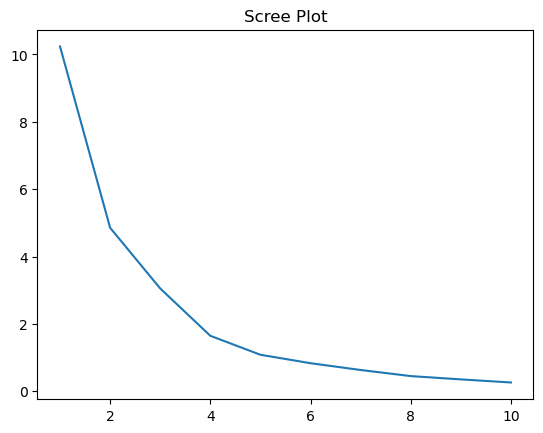

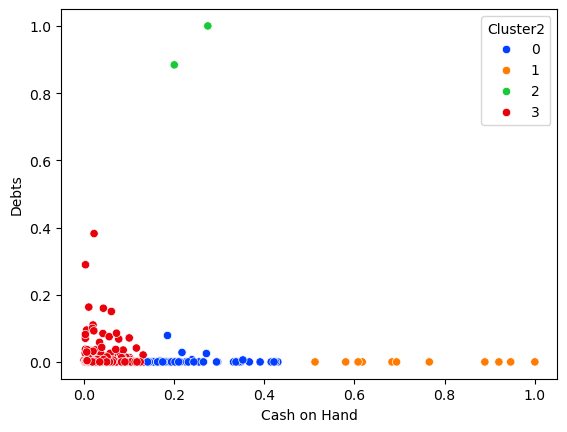

Cluster2
3    460
0     64
1     11
2      2
Name: count, dtype: int64


In [147]:
CD_norm = data[['Cash on Hand', 'Debts']]
CD_norm = data[['Cash on Hand', 'Debts']].apply(maxmin, axis=0)

k_bar = 10
SSE = [] # We'll store the training error here

for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(CD_norm) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot
plt.show()

# scatterplot ----

model = KMeans(n_clusters=4, max_iter=300, n_init = 10, random_state=0) # Create a model for k
data['Cluster2'] = model.fit_predict(CD_norm[['Cash on Hand', 'Debts']])
sns.scatterplot(x=CD_norm['Cash on Hand'], y=CD_norm['Debts'], hue=data['Cluster2'], palette='bright')
plt.show()

print(data['Cluster2'].value_counts())


In [148]:
data[data['Cluster2'] == 1]

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Cluster,Cluster2
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0,2,1
89,89,Chuck Schumer,Democratic,New York,Senate,35899966,25944350,20231213,0,2,1
261,261,John Kennedy,Republican,Louisiana,Senate,28119082,18276565,15530074,0,2,1
267,267,John Thune,Republican,South Dakota,Senate,6770674,2763217,17419927,0,0,1
274,274,Josh Gottheimer,Democratic,New Jersey,House,7720264,2045198,14024163,0,0,1
290,290,Katie Porter,Democratic,California,House,21441693,15946876,15762568,0,2,1
310,310,Lindsey Graham,Republican,South Carolina,Senate,6695582,5371524,13815515,0,0,1
340,340,Mark Kelly,Democratic,Arizona,Senate,73140886,61357281,13186127,0,1,1
412,412,Raja Krishnamoorthi,Democratic,Illinois,House,7843935,4638387,11633394,0,0,1
417,417,Raphael Warnock,Democratic,Georgia,Senate,86581469,75959810,22762985,0,1,1


In [151]:
data[data['Cluster2'] == 2]

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Cluster,Cluster2,Cluster3
133,133,David Trone,Democratic,Maryland,House,12990741,6878050,6206371,13302000,0,2,0
442,442,Ron Johnson,Republican,Wisconsin,Senate,27680901,23731653,4508581,11759857,2,2,0


I chose 4 groups for the optimal k. In the scatterplot, we can see that most candidates have less debts than cash on hand. The 2 smallest clusters are 1 and 2. Some politicians within the first group of high cash on hand and less debts are Mark Kelly, who was also a winner in the previous plot with high raisings and high spendings. There are 2 individuals with very high debts, David Trone and Ron Johnson. Most individuals with high cash on hand were also in the group with median raisings and median spendings. This may explain their cash on hand.

4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

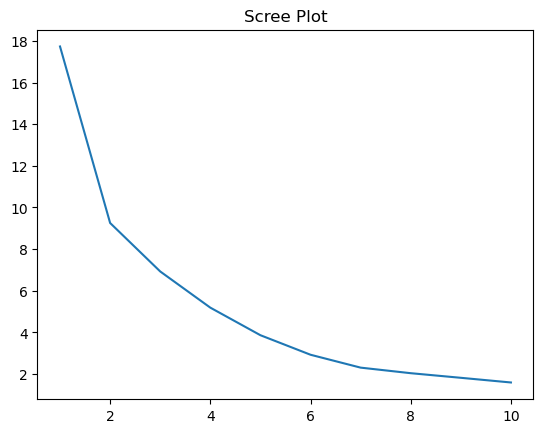

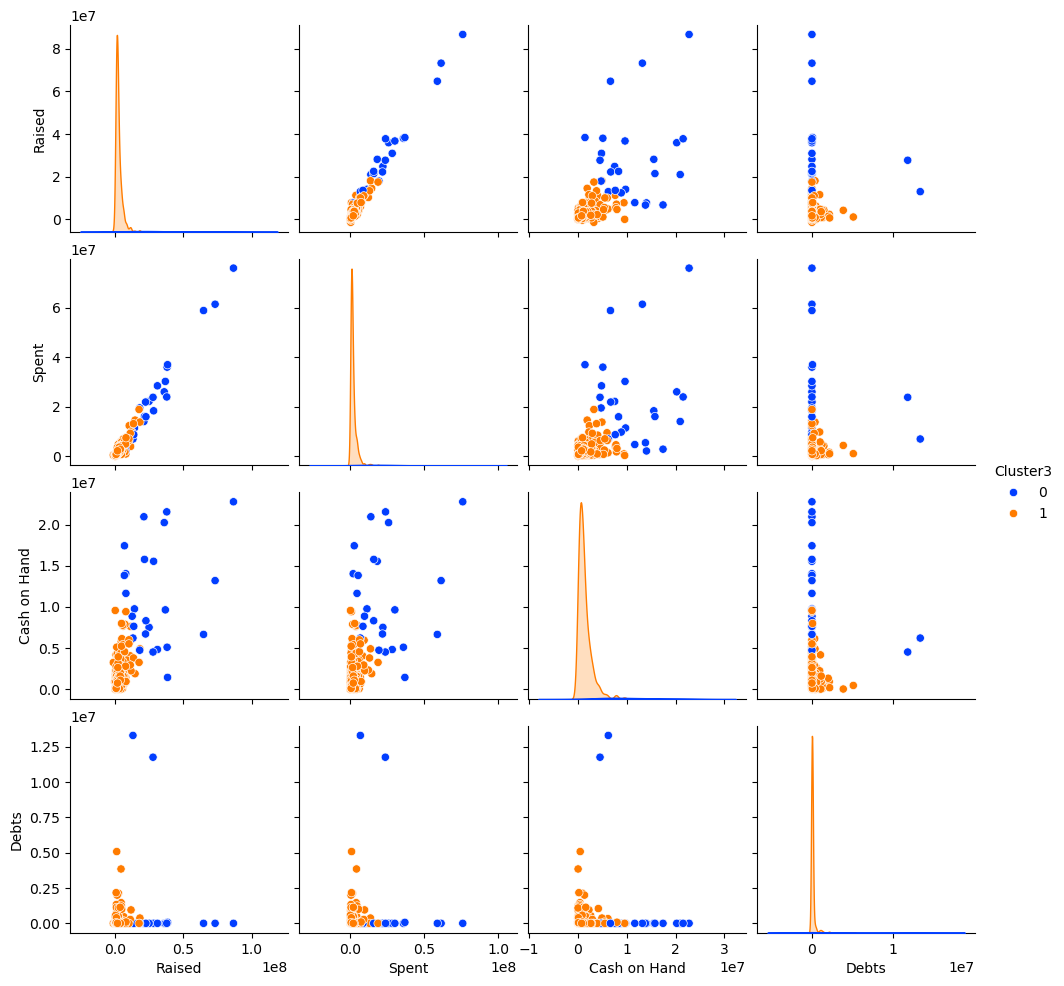

In [150]:
RSCD_norm = data[['Raised', 'Spent', 'Cash on Hand', 'Debts']]
RSCD_norm = RSCD_norm.apply(maxmin, axis=0)

k_bar = 10
SSE = [] # We'll store the training error here

for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(RSCD_norm) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot
plt.show()

# plot ----

model = KMeans(n_clusters=2, max_iter=300, n_init = 10, random_state=0) # Create a model for k
data['Cluster3'] = model.fit_predict(RSCD_norm)

sns.pairplot(data, hue='Cluster3', vars=['Raised', 'Spent', 'Cash on Hand', 'Debts'], palette='bright')
plt.show()


The optimal number of groups was 2, which was a little less than the 3 or 4 groups from before. After doing a pairplot, I think you can pretty distinctly tell that there are 2 groups. It aligns with the previous ones, as they also grouped high raised with high spent, and low raised with low spent. They also grouped the debts and cash on hand in a similar way as before.

I think this method is pretty useful to find how features are related and could uncover aspects of a candidate that could predict their election results. 

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?